**Building a Decision Tree to Predict Customer Churn**

In this task, I am trying to build a decision tree model to predict customer churn for a telecom company. **Customer churn** refers to when a customer stops doing business with a company. Predicting churn is crucial for businesses to retain customers by addressing their issues proactively.


Here I am using a synthetic dataset for this task. The dataset contains the following columns:

**CustomerID:** A unique identifier for each customer.

**Age:** The age of the customer.

**MonthlyCharge:** The monthly bill amount for the customer.

**CustomerServiceCalls:** The number of times the customer contacted customer service.

**Churn:** This is our target variable, indicating whether the customer churned (Yes) or not (No).

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
    'CustomerID': range(1, 101),  # Unique ID for each customer
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
    'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
    'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()



,CustomerID,Age,MonthlyCharge,CustomerServiceCalls,Churn
0,1,20,50,1,No
1,2,25,60,2,No
2,3,30,70,3,Yes
3,4,35,80,4,No
4,5,40,90,0,Yes


In [ ]:
# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 1.0


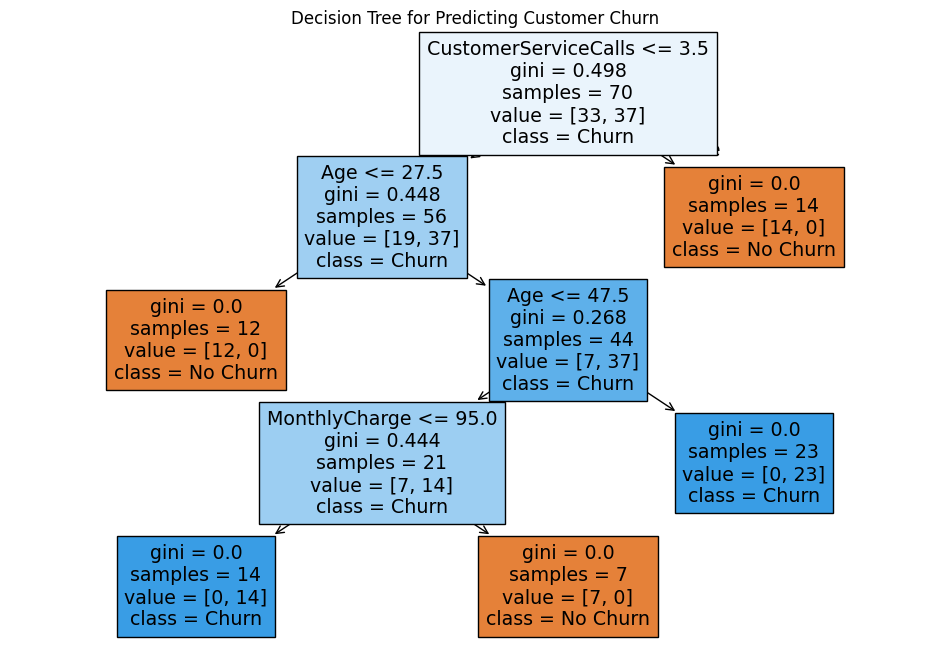

In [ ]:
# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

When visualizing a decision tree, especially one created using Scikit-learn's DecisionTreeClassifier, one'll notice several terms on each node of the tree. Understanding these terms is crucial for interpreting the tree's decision-making process. Let's break down each of these terms:

**Gini**

The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
The Gini impurity ranges from 0 to 0.5, where 0 indicates that all elements in the subset belong to the same class (perfect purity), and 0.5 means the data is randomly distributed across various classes.
In decision trees, a lower Gini impurity is generally preferred as it indicates greater purity of the node.

**Samples**

This value represents the number of samples (or records) that reach the node.
It gives an idea of how much of the training data is affected by the conditions leading to this node.
A high number of samples in a node means that the condition or rule associated with that node is relevant for a significant portion of the dataset.

**Value**

This shows the distribution of the samples in different classes at that particular node.
For a binary classification problem (like churn prediction with 'Yes' or 'No'), the value is presented as a list of two numbers. The first number indicates the count of samples in the first class, and the second number indicates the count of samples in the second class.
This distribution helps in understanding which class is predominant at a particular node.

**Class**

This indicates the class that would be predicted if the decision tree traversal ends at that node.
It is determined based on the majority class of the samples that reach the node. For instance, if most samples at a node belong to the 'No Churn' class, the node will predict 'No Churn'.

**Feature Name (e.g., 'Monthly Charge')**

This is not a standard part of the decision tree node description, but it may appear in the tree's branches.
It represents the feature (or attribute) used to split the data at that node.
For example, if you see "MonthlyCharge <= 80", it means that the tree is splitting the data at this node based on whether the monthly charge is less than or equal to 80.
Understanding these components is essential for interpreting how the decision tree makes its predictions and which features are influential in the decision-making process. This can provide valuable insights, especially in business contexts like customer churn prediction.